# Logistic Regression Assumptions
* Binary logistic regression requires the dependent variable to be binary.
*  For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau

## Data

In [2]:


# Set up directory
os.chdir("/home/siti/Downloads/New NHS Data")

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('AE_Synthetic_Data_Final_V02.csv')



In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12722216 entries, 0 to 12722215
Data columns (total 13 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   IMD_Category           object
 1   Age_Band               object
 2   Sex                    object
 3   AE_Arrive_HourOfDay    object
 4   AE_Time_Mins           int64 
 5   AE_HRG                 object
 6   AE_Num_Diagnoses       int64 
 7   AE_Num_Investigations  int64 
 8   AE_Num_Treatments      int64 
 9   AE_Arrival_Mode        object
 10  ICD10_Chapter_Code     object
 11  TFC                    object
 12  LOS_Category           object
dtypes: int64(4), object(9)
memory usage: 1.2+ GB
None


##  Pearson's Correlation for Continous-Continous Variables

In [4]:
continuous_vars = [col for col in df.columns if df[col].dtype != 'object' and df[col].dtype != 'category']

print(continuous_vars)

['AE_Time_Mins', 'AE_Num_Diagnoses', 'AE_Num_Investigations', 'AE_Num_Treatments']


In [5]:
# Compute the correlation matrix
corr_matrix = df[continuous_vars].corr()

# Save to CSV
corr_matrix.to_csv('pearson_correlation_matrix.csv')

In [6]:
corr_matrix

,AE_Time_Mins,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments
AE_Time_Mins,1.000000,-0.014954,0.150499,0.031901
AE_Num_Diagnoses,-0.014954,1.000000,0.095787,0.104330
AE_Num_Investigations,0.150499,0.095787,1.000000,0.397493
AE_Num_Treatments,0.031901,0.104330,0.397493,1.000000


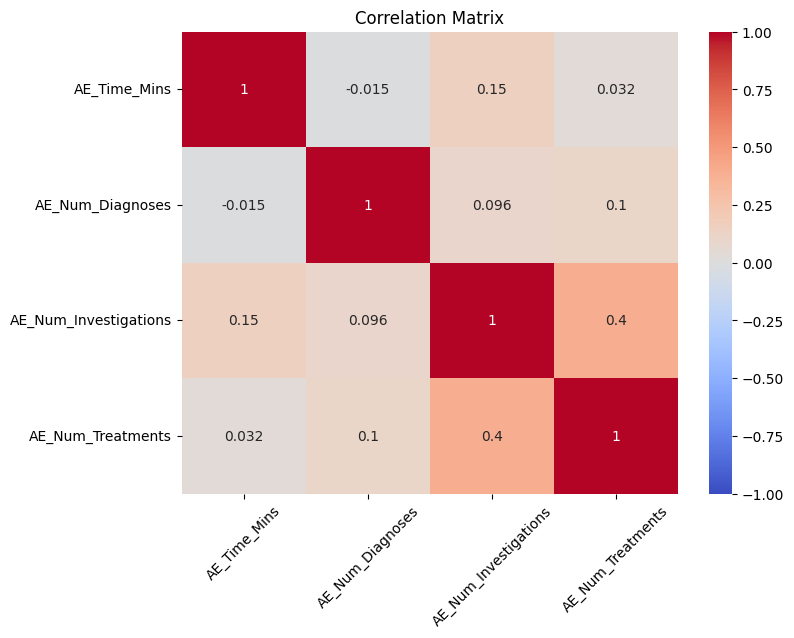

In [7]:
# Compute the correlation matrix
corr_matrix = df[continuous_vars].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Save the plot
plt.savefig('pearson_correlation_matrix_plt.png', dpi=300)

# Display the plot
plt.show()


## Spearman's Rank Correlation for Ordinal  Variables

### Ordinal Categorical Variables

In [8]:
IMD_order = ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']

# Convert 'IMD Category' column to an ordinal type
df['IMD_Category'] = pd.Categorical(df['IMD_Category'], categories=IMD_order, ordered=True)

print(df['IMD_Category'])

0           Most deprived 20%
1                   20% - 40%
2                   60% - 80%
3           Most deprived 20%
4           Most deprived 20%
                  ...        
12722211            60% - 80%
12722212    Most deprived 20%
12722213             40 - 60%
12722214            20% - 40%
12722215    Most deprived 20%
Name: IMD_Category, Length: 12722216, dtype: category
Categories (5, object): ['Most deprived 20%' < '20% - 40%' < '40 - 60%' < '60% - 80%' < 'Least deprived 20%']


In [9]:
Age_order = ['01-17', '18-24', '25-44', '45-64', '65-84' , '85+']

# Convert 'Age_Band' column to an ordinal type
df['Age_Band'] = pd.Categorical(df['Age_Band'], categories=Age_order, ordered=True)

print(df['Age_Band'])

0           65-84
1             85+
2           65-84
3           65-84
4           45-64
            ...  
12722211    01-17
12722212    45-64
12722213    01-17
12722214      85+
12722215    45-64
Name: Age_Band, Length: 12722216, dtype: category
Categories (6, object): ['01-17' < '18-24' < '25-44' < '45-64' < '65-84' < '85+']


In [10]:
Hour_order = ['01-04','05-08','09-12','13-16','17-20','21-24' ]

# Convert 'AE_Arrive_HourOfDay' column to an ordinal type
df['AE_Arrive_HourOfDay'] = pd.Categorical(df['AE_Arrive_HourOfDay'], categories=Hour_order, ordered=True)

print(df['AE_Arrive_HourOfDay'])

0           17-20
1           13-16
2           09-12
3           13-16
4           13-16
            ...  
12722211    01-04
12722212    13-16
12722213    21-24
12722214    13-16
12722215    09-12
Name: AE_Arrive_HourOfDay, Length: 12722216, dtype: category
Categories (6, object): ['01-04' < '05-08' < '09-12' < '13-16' < '17-20' < '21-24']


In [11]:
HRG_order = ['Nothing', 'Low' , 'Medium', 'High' ]
    
# Convert 'Month' column to an ordinal type
df['AE_HRG'] = pd.Categorical(df['AE_HRG'], categories=HRG_order, ordered=True)

print(df['AE_HRG'])  

0              High
1               Low
2           Nothing
3               Low
4              High
             ...   
12722211        Low
12722212        Low
12722213     Medium
12722214        Low
12722215        Low
Name: AE_HRG, Length: 12722216, dtype: category
Categories (4, object): ['Nothing' < 'Low' < 'Medium' < 'High']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12722216 entries, 0 to 12722215
Data columns (total 13 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   IMD_Category           category
 1   Age_Band               category
 2   Sex                    object  
 3   AE_Arrive_HourOfDay    category
 4   AE_Time_Mins           int64   
 5   AE_HRG                 category
 6   AE_Num_Diagnoses       int64   
 7   AE_Num_Investigations  int64   
 8   AE_Num_Treatments      int64   
 9   AE_Arrival_Mode        object  
 10  ICD10_Chapter_Code     object  
 11  TFC                    object  
 12  LOS_Category           object  
dtypes: category(4), int64(4), object(5)
memory usage: 922.1+ MB


In [13]:
ordinal_vars = [col for col in df.columns if df[col].dtype == 'category']
print(ordinal_vars)

['IMD_Category', 'Age_Band', 'AE_Arrive_HourOfDay', 'AE_HRG']


In [14]:

correlations = {}

# Calculate Spearman's correlation for each pair
for i in range(len(ordinal_vars)):
    for j in range(i+1, len(ordinal_vars)):  # j starts from i+1 to avoid duplicate pairs and self-correlation
        col1 = ordinal_vars[i]
        col2 = ordinal_vars[j]
        spearman_corr, _ = spearmanr(df[col1].cat.codes, df[col2].cat.codes)
        
        correlations[f'{col1}-{col2}'] = {
            "Spearman's Rank Correlation": spearman_corr
        }

# Print the correlations
for pair, corrs in correlations.items():
    print(pair)
    for method, value in corrs.items():
        print(f'{method}: {value}')
    print('-' * 50)

# Convert the correlations dictionary to a Pandas DataFrame
correlations_df = pd.DataFrame.from_dict(correlations, orient='index')


IMD_Category-Age_Band
Spearman's Rank Correlation: 0.027075608581631362
--------------------------------------------------
IMD_Category-AE_Arrive_HourOfDay
Spearman's Rank Correlation: 0.00024462027500623407
--------------------------------------------------
IMD_Category-AE_HRG
Spearman's Rank Correlation: 0.018967642603217167
--------------------------------------------------
Age_Band-AE_Arrive_HourOfDay
Spearman's Rank Correlation: -0.016835146346201927
--------------------------------------------------
Age_Band-AE_HRG
Spearman's Rank Correlation: 0.018465866880241395
--------------------------------------------------
AE_Arrive_HourOfDay-AE_HRG
Spearman's Rank Correlation: 4.809487617068499e-05
--------------------------------------------------


In [15]:

# Create an empty DataFrame to store Spearman's rank correlations
spearman_df = pd.DataFrame(index=ordinal_vars, columns=ordinal_vars)

# Calculate Spearman's correlations for each pair of ordinal variables
for col1 in ordinal_vars:
    for col2 in ordinal_vars:
        if col1 != col2:
            spearman_corr, _ = spearmanr(df[col1].cat.codes, df[col2].cat.codes)
            spearman_df.loc[col1, col2] = spearman_corr

# Save Spearman's results to a CSV file
spearman_df.to_csv('spearman_correlation_matrix.csv')


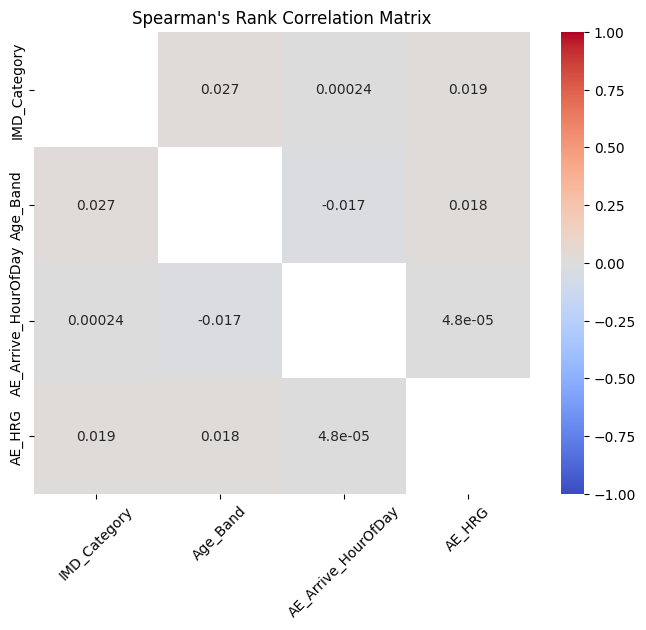

In [16]:
# Visualize Spearman's Rank Correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_df.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Rank Correlation Matrix")
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.savefig('spearman_correlation_matrix_plt.png', dpi=300)
plt.show()



## Cramér's V for Categorical-Categorical Variables

In [24]:
categorical_vars = ['Sex', 'AE_Arrival_Mode', 'ICD10_Chapter_Code', 'TFC']
print(categorical_vars)

['Sex', 'AE_Arrival_Mode', 'ICD10_Chapter_Code', 'TFC']


In [25]:
from scipy.stats import chi2_contingency

cramers_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculate Cramér's V for each pair of categorical variables
for col1 in categorical_vars:
    for col2 in categorical_vars:  
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)

            # Calculating Cramér's V
            n = contingency_table.sum().sum()
            phi2 = chi2 / n
            cramers_v = np.sqrt(phi2 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1))
            
            cramers_df.loc[col1, col2] = cramers_v

cramers_df.to_csv('cramers_correlation_matrix.csv')

In [28]:
# CHI- SQUARE TEST


from scipy.stats import chi2_contingency


# Create a DataFrame to store the Chi2 and p-values
chi2_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Loop through each pair of categorical variables
for col1 in categorical_vars:
    for col2 in categorical_vars:  
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Perform the chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
            # Save the Chi2 and p-value to the DataFrame
            chi2_df.loc[col1, col2] = (chi2, p_value)

# Save the DataFrame to a CSV file
chi2_df.to_csv('chi2_pvalue_matrix.csv')



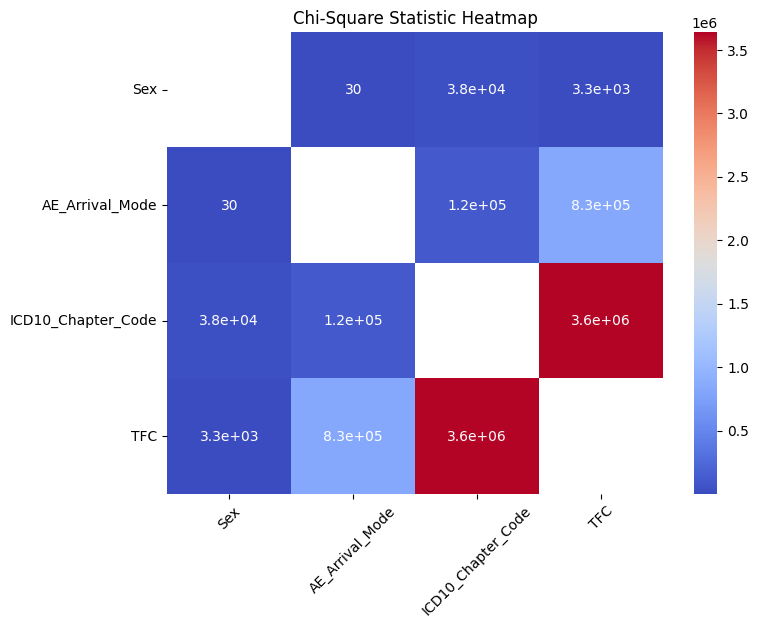

In [21]:
# Plot the chi2 values as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(chi2_df, annot=True, cmap='coolwarm')
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Chi-Square Statistic Heatmap')
plt.show()


In [29]:

# # Calculate Cramér's V for each pair of categorical variables
# cramers_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
# for col1 in categorical_vars:
#     for col2 in categorical_vars:  
#         if col1 != col2:
#             contingency_table = pd.crosstab(df[col1], df[col2])
#             chi2, _, _, _ = chi2_contingency(contingency_table)

#             # Calculating Cramér's V
#             n = contingency_table.sum().sum()
#             phi2 = chi2 / n
#             cramers_v = np.sqrt(phi2 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1))
            
#             cramers_df.loc[col1, col2] = cramers_v

# cramers_df.to_csv('cramers_correlation_matrix_v02.csv')

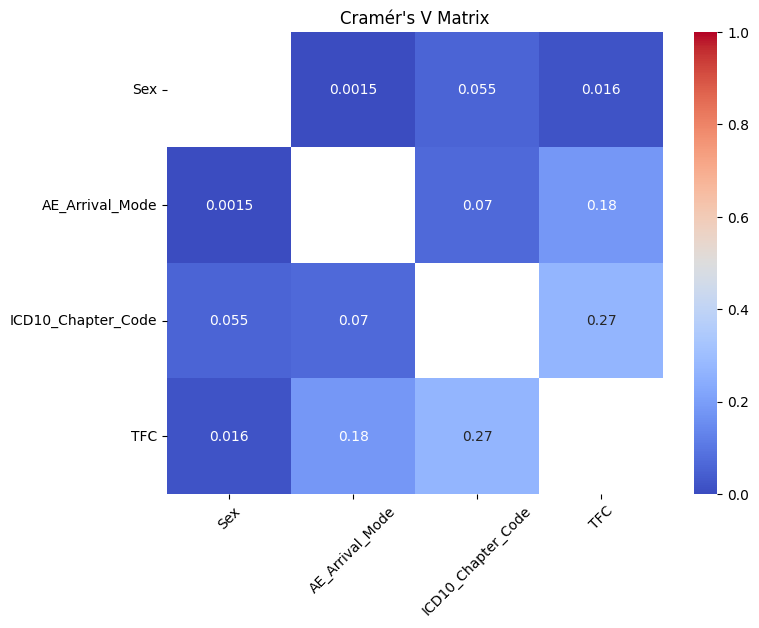

In [26]:
# Visualize Cramér's V matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_df.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Matrix")
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.savefig('cramer_v_correlation_matrix_plt.png', dpi=300)
plt.show()

## Interpretation

# Combined Plots

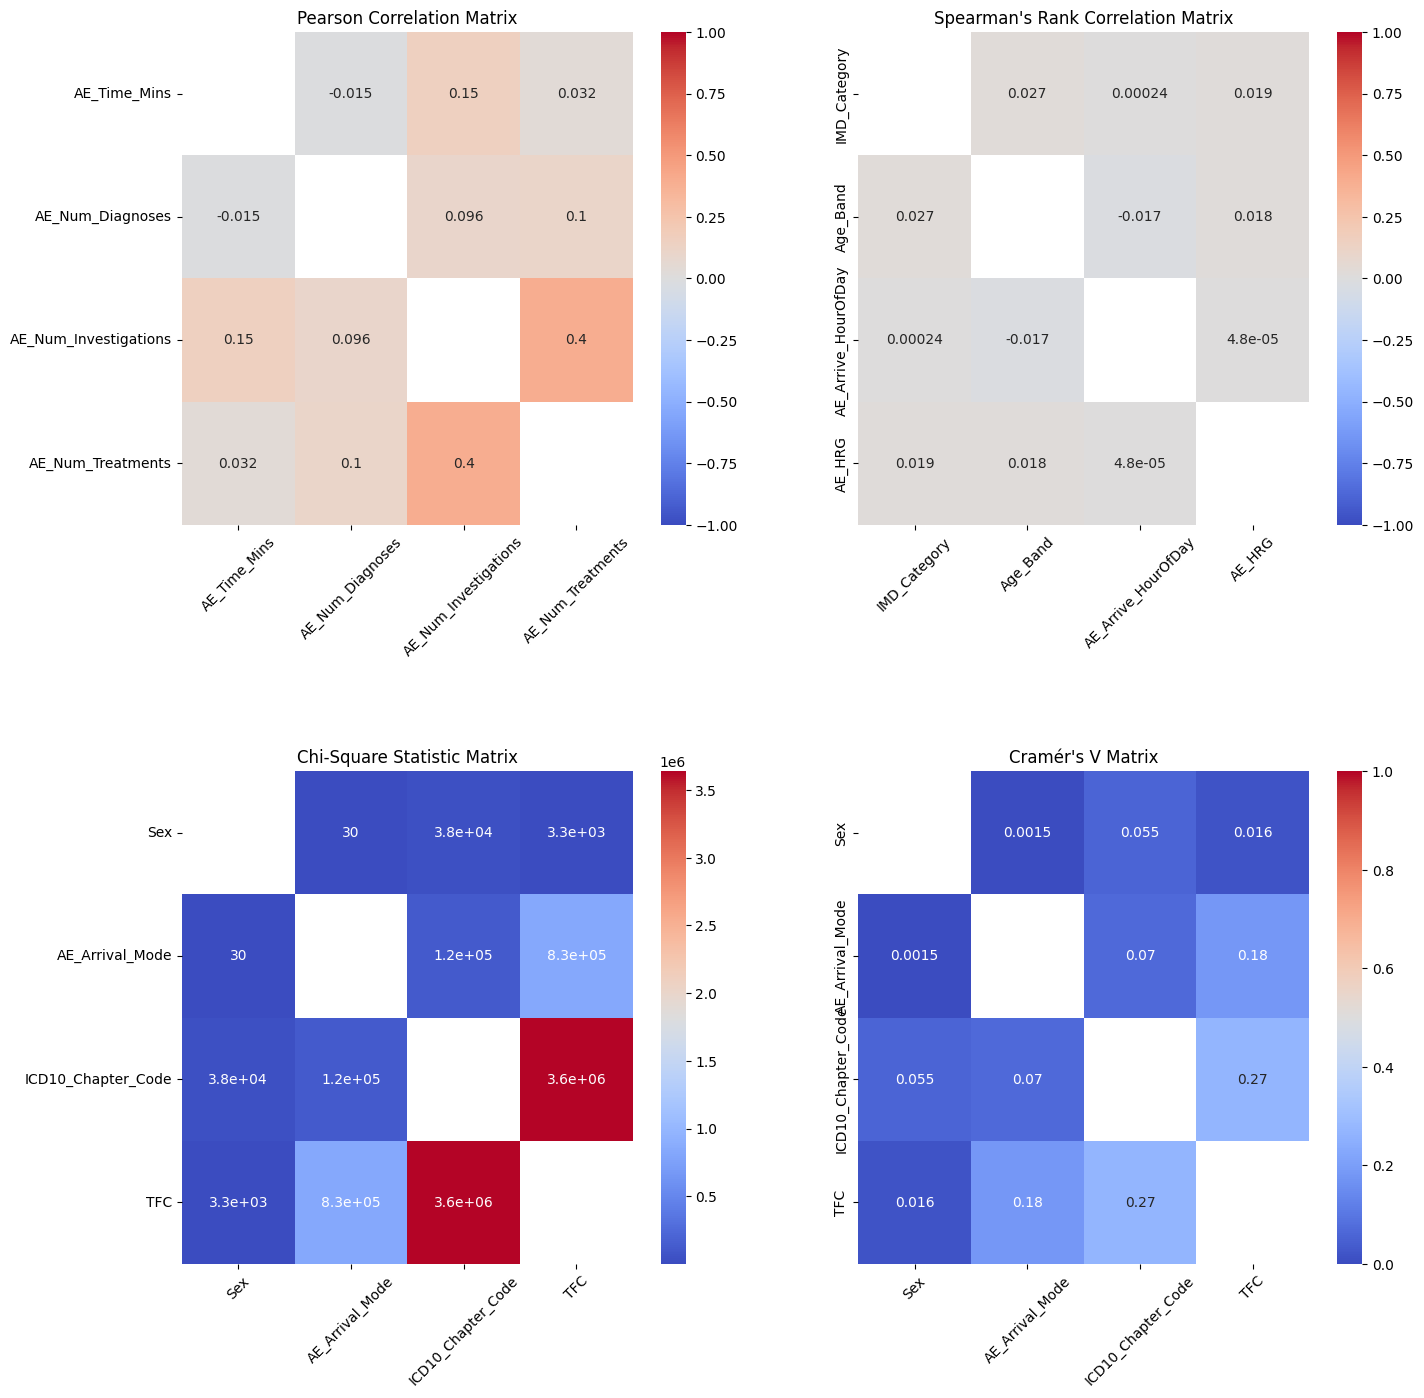

In [31]:
# Set the diagonal to NaN for consistency across all matrices
np.fill_diagonal(corr_matrix.values, np.nan)
np.fill_diagonal(spearman_df.values, np.nan)
np.fill_diagonal(chi2_df.values, np.nan)
np.fill_diagonal(cramers_df.values, np.nan)

fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Plot Pearson Correlation Matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0, 0])
axes[0, 0].set_title('Pearson Correlation Matrix')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), rotation=0)

# Plot Spearman Correlation Matrix
sns.heatmap(spearman_df.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0, 1])
axes[0, 1].set_title("Spearman's Rank Correlation Matrix")
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Chi-Square Test Heatmap
sns.heatmap(chi2_df, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Chi-Square Statistic Matrix')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_yticklabels(axes[1, 0].get_yticklabels(), rotation=0)

# Plot Cramér's V Matrix
sns.heatmap(cramers_df.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=axes[1, 1])
axes[1, 1].set_title("Cramér's V Matrix")
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust the height space between subplots to avoid overlap
plt.subplots_adjust(hspace=0.5)

# Save the plot with tight layout
plt.savefig('combined_correlation_matrices.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
